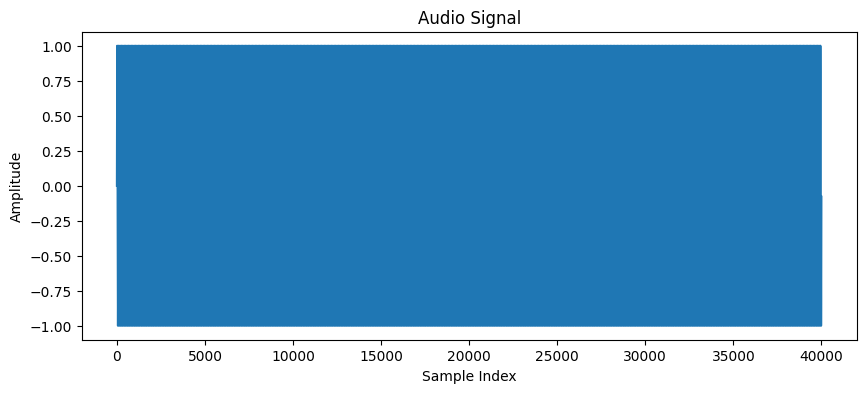

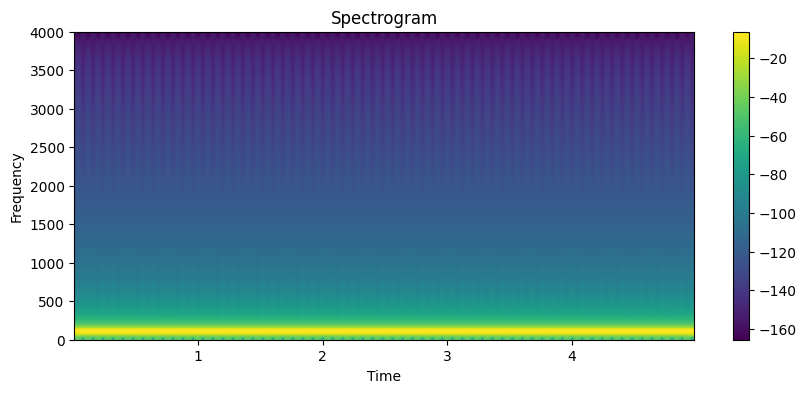

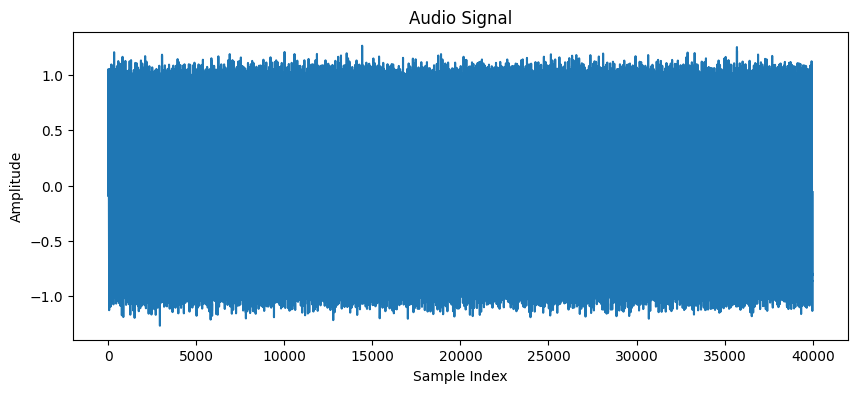

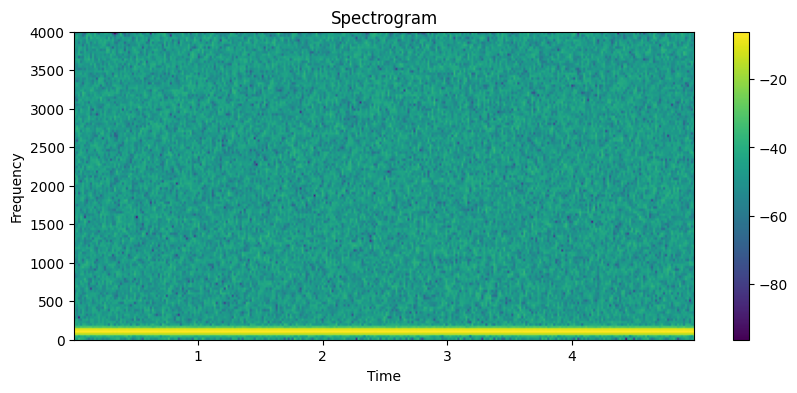

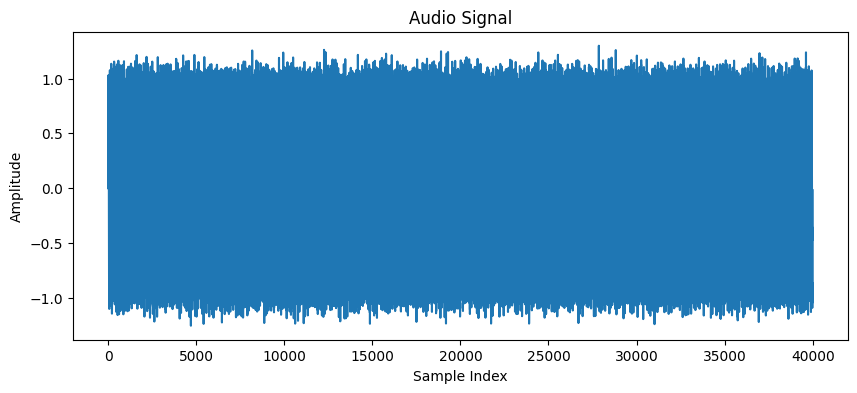

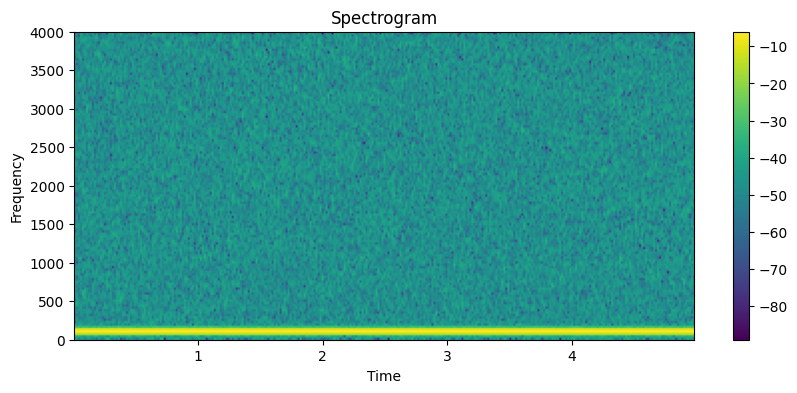

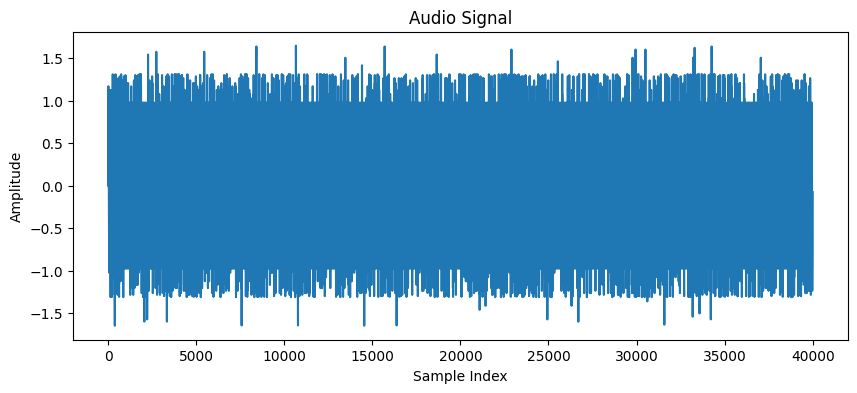

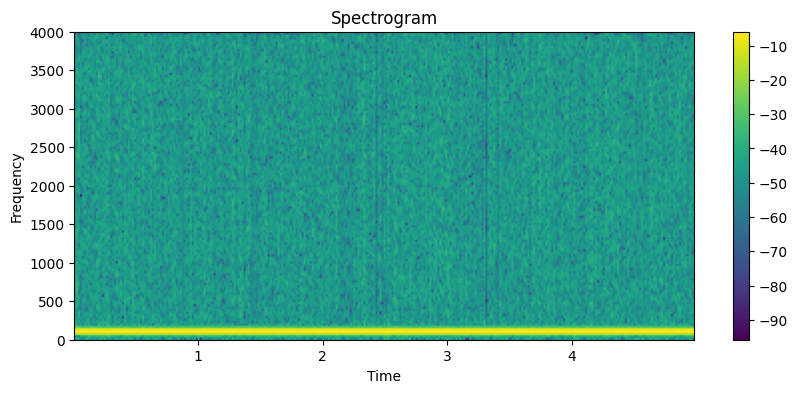

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


def generate_sinusoidal_waveform(freq=100, duration=5, sample_rate=8000):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    waveform = np.sin(2 * np.pi * freq * t).reshape(1, -1)
    return waveform, sample_rate


# Wizualizacja sygnału
def plot_waveform(waveform):
    plt.figure(figsize=(10, 4))
    plt.plot(waveform[0])
    plt.title("Audio Signal")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()


def plot_spectrogram(waveform, sample_rate):
    plt.figure(figsize=(10, 4))
    plt.specgram(waveform[0], Fs=sample_rate, scale="default", mode="magnitude")
    plt.title("Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar()
    plt.show()


def add_scaled_noise_rms(
    signal: np.ndarray, intensity=0.5, noise_type="gaussian", log_metrics=False
) -> np.ndarray:
    rms_signal = np.sqrt(np.mean(signal**2))
    rms_noise = intensity * rms_signal

    match noise_type:
        case "gaussian":
            noise = np.random.normal(0, rms_noise, signal.shape)
        case "rayleigh":
            sigma = rms_noise / np.sqrt(2 - np.pi / 2)
            noise = np.random.rayleigh(sigma, signal.shape)
            noise = noise - np.mean(noise) 
            signs = np.sign(signal)
            noise = noise * rms_noise / np.sqrt(np.mean(noise**2))
            noise = noise * signs
        case "poisson":
            lambda_vals = np.abs(signal) * rms_noise
            noise = np.random.poisson(lambda_vals, signal.shape) - lambda_vals
            noise = noise - np.mean(noise) 
            signs = np.sign(signal)
            noise = noise * rms_noise / np.sqrt(np.mean(noise**2))
            noise = noise * signs
        case _:
            raise ValueError("Nieobsługiwany typ szumu.")

    if log_metrics:
        rms_actual_noise = np.sqrt(np.mean(noise**2))
        snr = (
            20 * np.log10(rms_signal / rms_actual_noise)
            if rms_actual_noise > 0
            else float("inf")
        )
        
        print(f"RMS Signal: {rms_signal:.4f}")
        print(f"RMS Noise: {rms_actual_noise:.4f}")
        print(f"SNR: {snr:.2f} dB")

    return signal + noise


waveform, sample_rate = generate_sinusoidal_waveform()
plot_waveform(waveform)
plot_spectrogram(waveform, sample_rate)
display(Audio(waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_rms(waveform, intensity=0.1, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_rms(waveform, intensity=0.1, noise_type="rayleigh")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_rms(waveform, intensity=0.1, noise_type="poisson")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

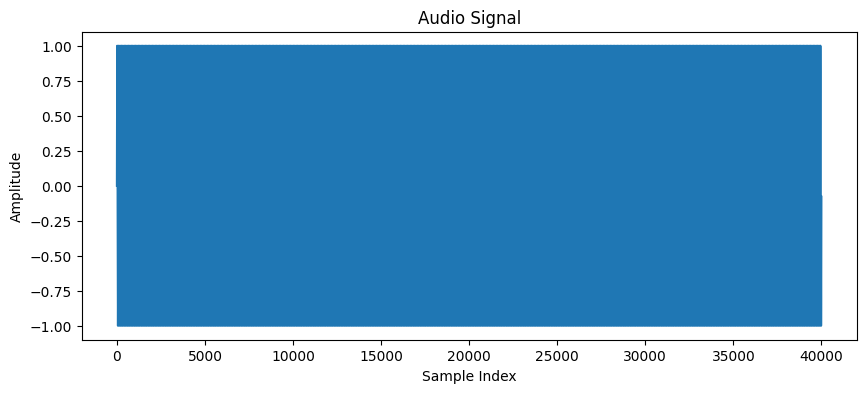

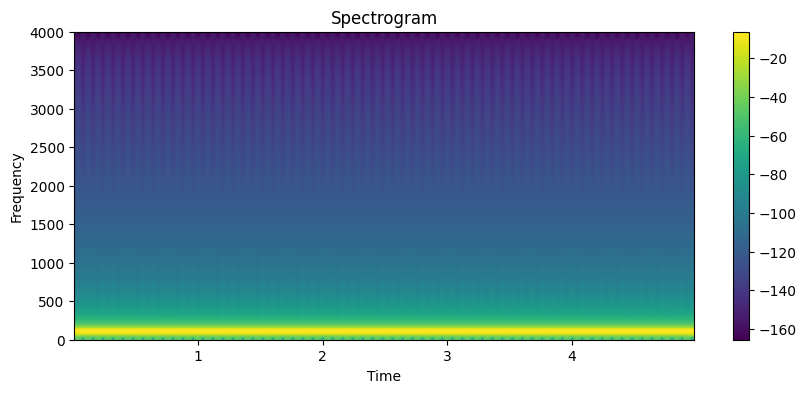

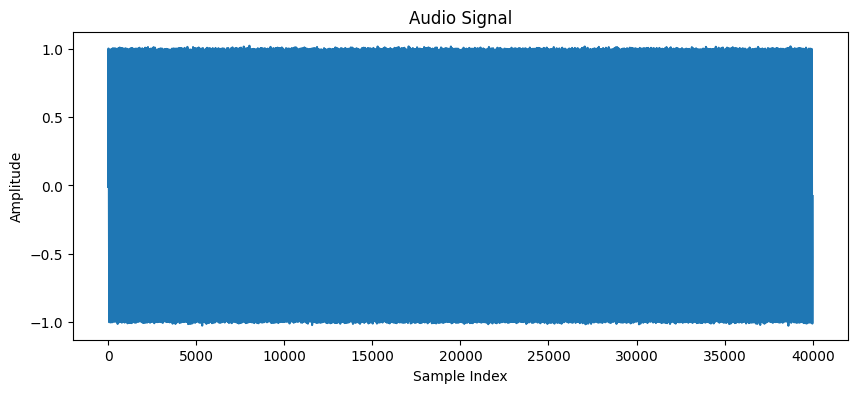

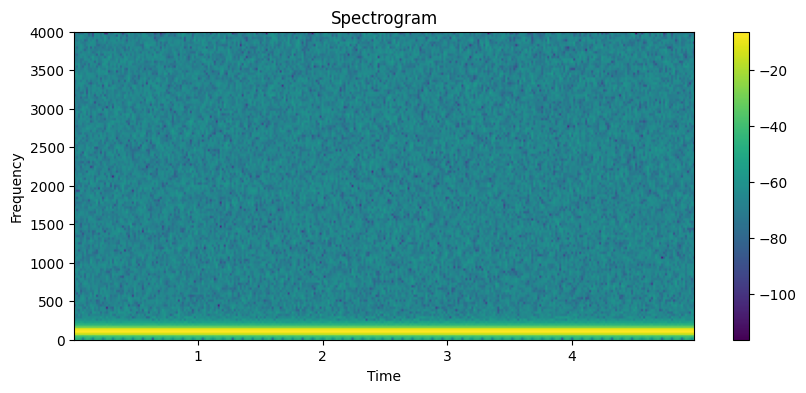

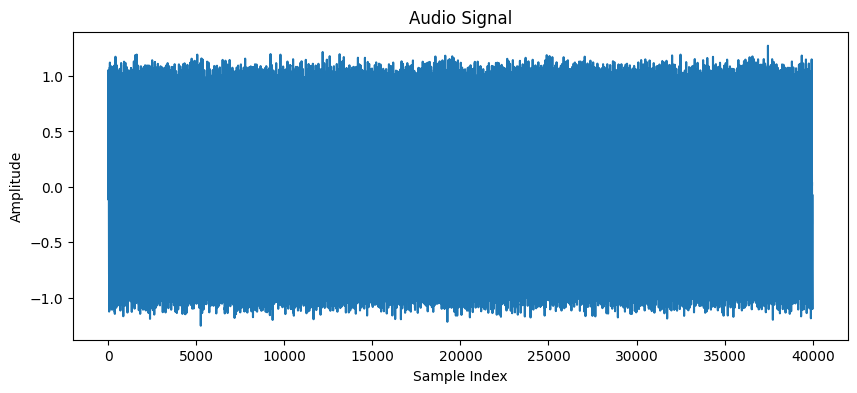

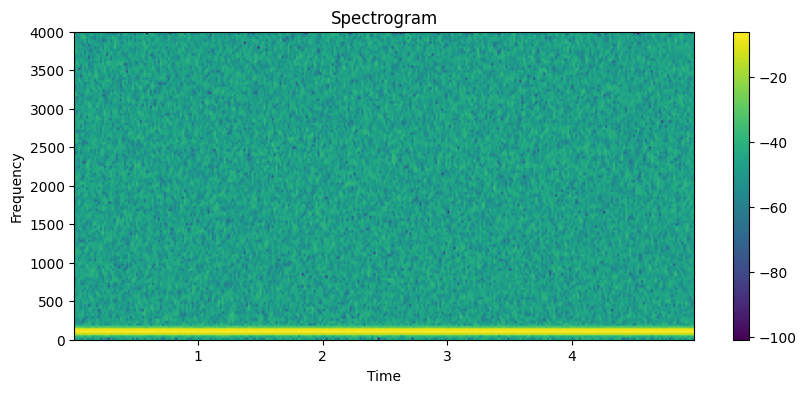

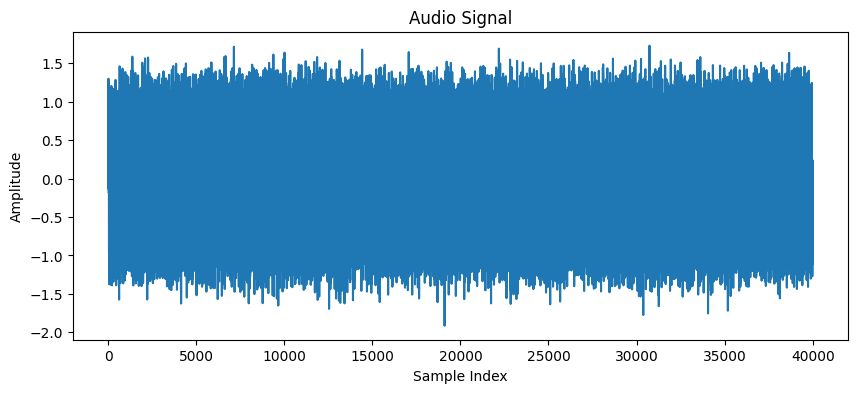

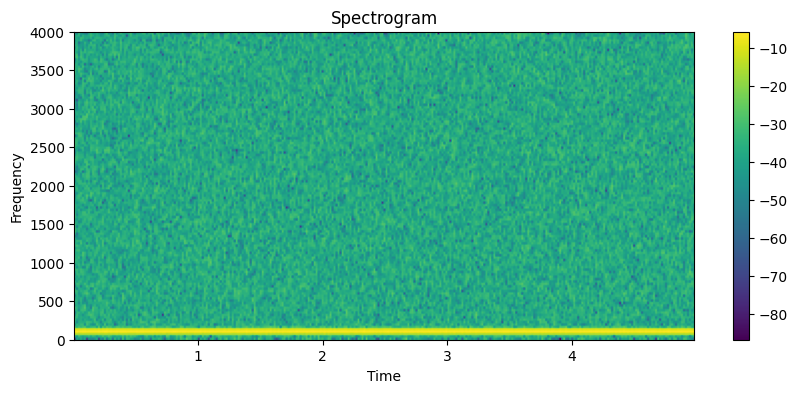

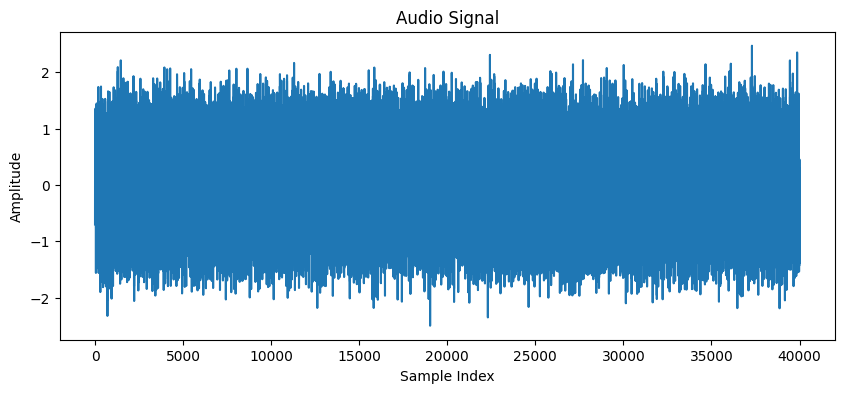

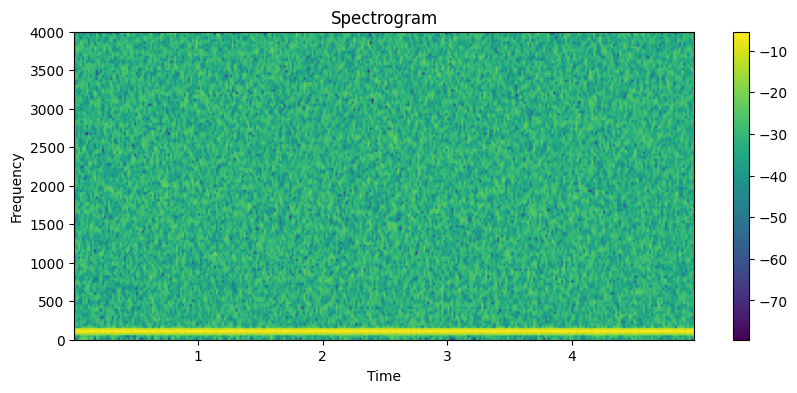

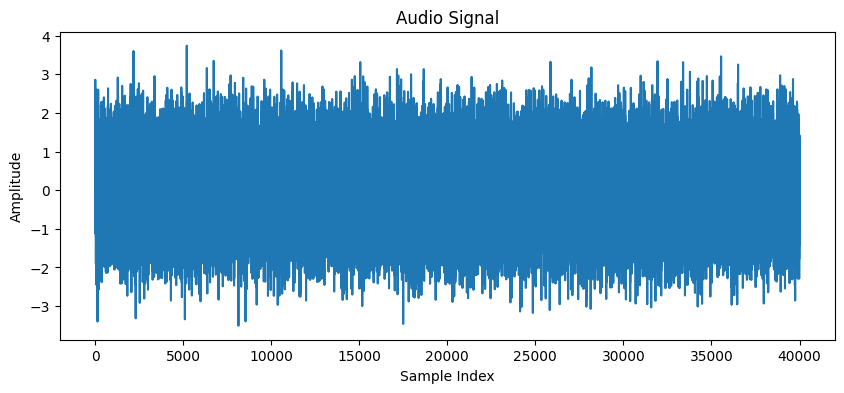

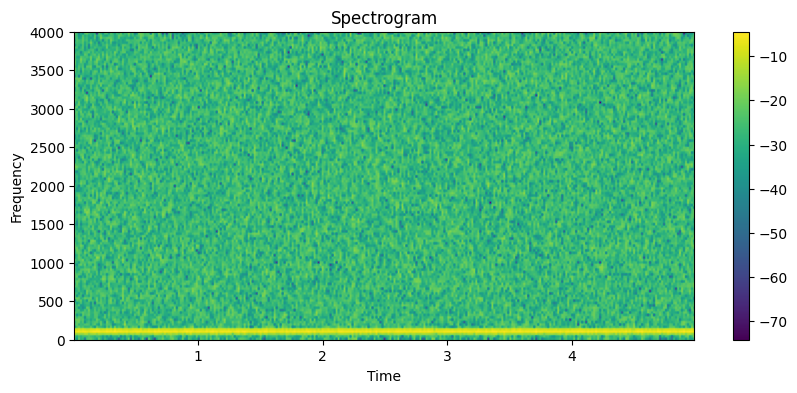

In [4]:
def add_scaled_noise_snr(
    signal: np.ndarray, target_snr: float, noise_type="gaussian", log_metrics=False
) -> np.ndarray:
    rms_signal = np.sqrt(np.mean(signal**2))
    snr_linear = 10 ** (target_snr / 20)
    rms_noise = rms_signal / snr_linear

    match noise_type:
        case "gaussian":
            noise = np.random.normal(0, rms_noise, signal.shape)
        case "rayleigh":
            sigma = rms_noise / np.sqrt(2 - np.pi / 2)
            noise = np.random.rayleigh(sigma, signal.shape)
            noise = noise - np.mean(noise)
            signs = np.sign(signal)
            noise = noise * rms_noise / np.sqrt(np.mean(noise**2))
            noise = noise * signs
        case "poisson":
            lambda_vals = np.abs(signal) * rms_noise
            noise = np.random.poisson(lambda_vals, signal.shape) - lambda_vals
            noise = noise - np.mean(noise)
            signs = np.sign(signal)
            noise = noise * rms_noise / np.sqrt(np.mean(noise**2))
            noise = noise * signs
        case _:
            raise ValueError("Unsupported noise type.")

    if log_metrics:
        rms_actual_noise = np.sqrt(np.mean(noise**2))
        snr = (
            20 * np.log10(rms_signal / rms_actual_noise)
            if rms_actual_noise > 0
            else float("inf")
        )

        # Print RMS and SNR
        print(f"RMS Signal: {rms_signal:.4f}")
        print(f"RMS Noise: {rms_actual_noise:.4f}")
        print(f"SNR: {snr:.2f} dB")

    return signal + noise


waveform, sample_rate = generate_sinusoidal_waveform()
plot_waveform(waveform)
plot_spectrogram(waveform, sample_rate)
display(Audio(waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_snr(waveform, target_snr=40, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_snr(waveform, target_snr=20, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_snr(waveform, target_snr=10, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

noisy_waveform = add_scaled_noise_snr(waveform, target_snr=5, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))


noisy_waveform = add_scaled_noise_snr(waveform, target_snr=0, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sample_rate)
display(Audio(noisy_waveform[0], rate=sample_rate))

array([[ 0.        ,  0.0784591 ,  0.15643447, ..., -0.23344536,
        -0.15643447, -0.0784591 ]])

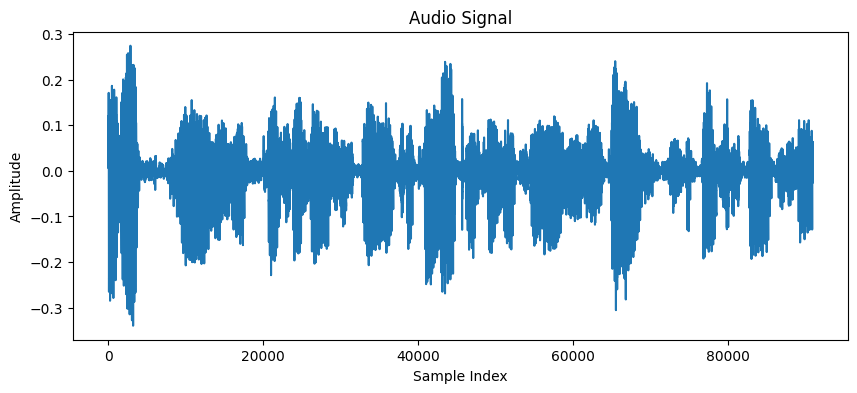

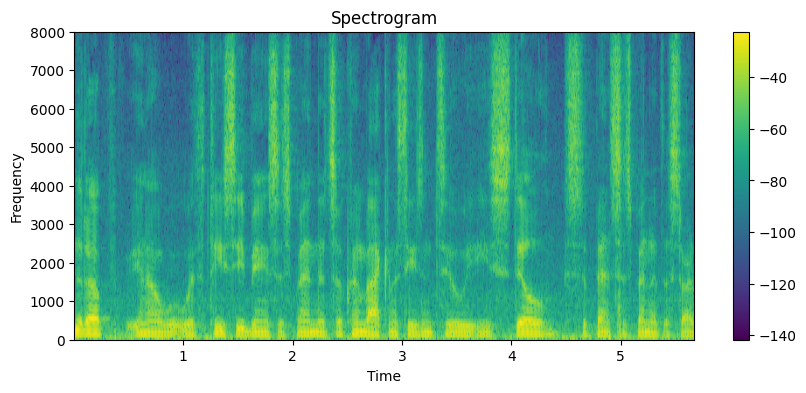

In [11]:
import torchaudio


waveform, sr = torchaudio.load("test.wav")

plot_waveform(waveform)
plot_spectrogram(waveform, sr)
display(Audio(waveform[0], rate=sr))


In [12]:
waveform

tensor([[0.0973, 0.0979, 0.1063,  ..., 0.0498, 0.0484, 0.0463]])

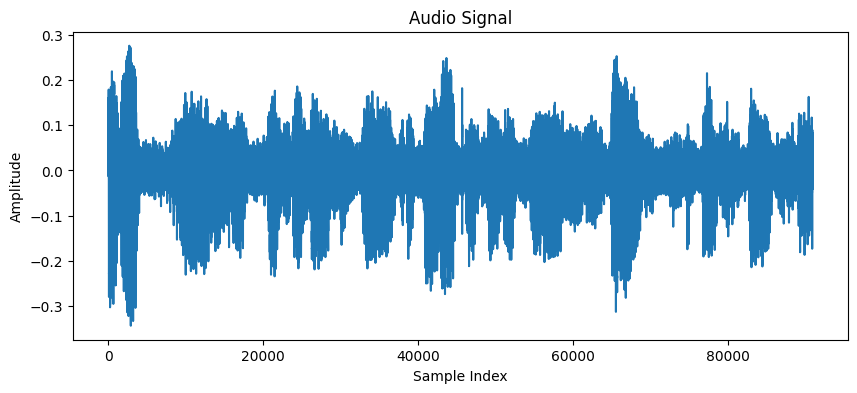

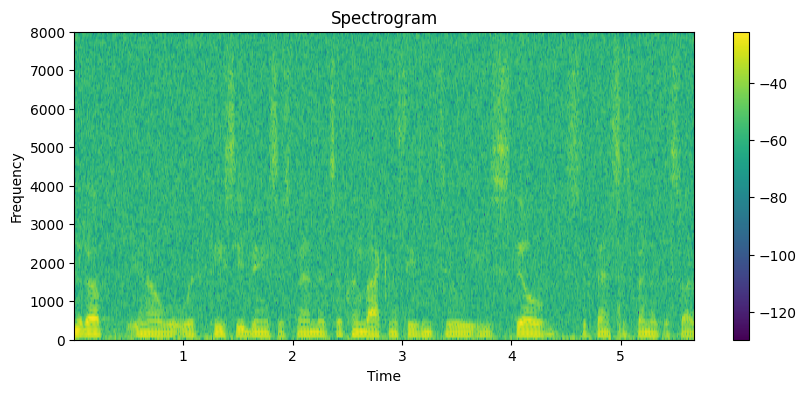

In [13]:
noisy_waveform = add_scaled_noise_snr(waveform.numpy(), target_snr=10, noise_type="gaussian")
plot_waveform(noisy_waveform)
plot_spectrogram(noisy_waveform, sr)
display(Audio(noisy_waveform, rate=sr))